# What kind of person are you? A clustering analysis:
For this project I found an extremely interesting dataset on Kaggle which is a survey of young people with a wide range of variables(150 of them to be precise) from movie tastes to health habits.  I will be performing a clustering analysis to group people based on a number of variables and finally label them myself based on my intuition. This is my first clustering project and I hope to gain a deeper understanding on clustering. I personally find this dataset very interesting because there is such a wide, interesting collection of variables which lets me choose  variables and customize the analysis to my liking and proceed from there. This is my first clustering analysis! So any input is appreciated.

## The data:
In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to
participate in this survey.

The data file (responses.csv) consists of 1010 rows and 150 columns (139
integer and 11 categorical).
For convenience, the original variable names were shortened in the
data file. See the columns.csv file if you want to match the data with the original names.
The data contain missing values.
The survey was presented to participants in both electronic and written form.
The original questionnaire was in Slovak language and was later translated
into English.
All participants were of Slovakian nationality, aged between 15-30.
The variables can be split into the following groups:

Music preferences (19 items)

Movie preferences (12 items)

Hobbies & interests (32 items)

Phobias (10 items)

Health habits (3 items)

Personality traits, views on life, & opinions (57 items)

Spending habits (7 items)

Demographics (10 items)

## The Questions:
These are the questions in the survey I have decided to pursue with in my analysis:
MOVIE PREFERENCES
1. I really enjoy watching movies.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
2. Horror movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)

3. Comedies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)

4. Romantic movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)

5. Sci-fi movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)

6. War movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)

7. Documentaries: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)

8. Action movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)

9. History: Not interested 1-2-3-4-5 Very interested (integer)

10. Outdoor activities: Not interested 1-2-3-4-5 Very interested (integer)

11. Celebrity lifestyle: Not interested 1-2-3-4-5 Very interested (integer)

12. Science and technology: Not interested 1-2-3-4-5 Very interested (integer)

13. Drinking: Never - Social drinker - Drink a lot (categorical)

14. I live a very healthy lifestyle.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

15. I try to do tasks as soon as possible and not leave them until last minute.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

16. I often study or work even in my spare time.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
I look at things from all different angles before I go ahead.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

17. I have lots of friends.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

18. I am always full of life and energy.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

19. I have many different hobbies and interests.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

20. How much time do you spend online?: No time at all - Less than an hour a day - Few hours a day - Most of the day (categorical)

21. I save all the money I can.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

22. I spend a lot of money on partying and socializing.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

23. I spend a lot of money on gadgets.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

24. I will hapilly pay more money for good, quality or healthy food.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

25. Age: (integer)

26. Art: Not interested 1-2-3-4-5 Very interested (integer)

27. I enjoy meeting new people.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)



### Loading the data and libraries:

In [1]:
#importing dataset from kaggle:
!pip install kaggle
!mkdir ~/.kaggle
!echo '{"username":"melvin97n","key":"e8805b38b4617ec29d832f8bbdfeaab8"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d miroslavsabo/young-people-survey
!unzip /content/young-people-survey.zip

  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 31.4MB/s]
Archive:  /content/young-people-survey.zip
  inflating: columns.csv             
  inflating: responses.csv           


In [31]:
# Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.graph_objects as go

## Exploratory data analysis and data pre-processing:
First let us take a look at the entire data set.

In [2]:
df=pd.read_csv('/content/responses.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


What we can see is that there are 150 variables and using all of them is going to be extremely confusing, redundant and ineffective for analysis. So, instead, the first thing we do is handpick a few(27) I would love to use for this project to make my clutering analysis. Let us take a look at the variables chosen along with their info.

In [3]:
mapping=pd.read_csv('/content/columns.csv')
final=df[['Movies','Horror','Comedy','Romantic','Sci-fi','War','Documentary','Action','History','Countryside, outdoors','Celebrities','Science and technology','Art exhibitions','Alcohol','Healthy eating','Prioritising workload','Workaholism','Number of friends','Interests or hobbies','Internet usage','Energy levels','Finances','Socializing','Entertainment spending','Spending on gadgets','Spending on healthy eating','Age']]
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Movies                      1004 non-null   float64
 1   Horror                      1008 non-null   float64
 2   Comedy                      1007 non-null   float64
 3   Romantic                    1007 non-null   float64
 4   Sci-fi                      1008 non-null   float64
 5   War                         1008 non-null   float64
 6   Documentary                 1002 non-null   float64
 7   Action                      1008 non-null   float64
 8   History                     1008 non-null   float64
 9   Countryside, outdoors       1003 non-null   float64
 10  Celebrities                 1008 non-null   float64
 11  Science and technology      1004 non-null   float64
 12  Art exhibitions             1004 non-null   float64
 13  Alcohol                     1005 

We can see that most of the values are numerical values(integers actually). Another point we can notice is that quite a few values are missing from a lot of the columns. We can take a deeper look at that soon. Also we notice that there are two objects and from looking at the head. We can see that they too heirichal objects and can easily be translated into numerical values.Let us take a look at the missing values.

In [4]:
final.isna().sum()

Movies                        6
Horror                        2
Comedy                        3
Romantic                      3
Sci-fi                        2
War                           2
Documentary                   8
Action                        2
History                       2
Countryside, outdoors         7
Celebrities                   2
Science and technology        6
Art exhibitions               6
Alcohol                       5
Healthy eating                3
Prioritising workload         5
Workaholism                   5
Number of friends             0
Interests or hobbies          3
Internet usage                0
Energy levels                 5
Finances                      3
Socializing                   5
Entertainment spending        3
Spending on gadgets           0
Spending on healthy eating    2
Age                           7
dtype: int64

For handling our missing values we will be using the median to fill in our gaps(median is a good measure considering that all our data is actually categorical data).

Next, we will convert all our values into numerical values.

In [5]:
final['Alcohol'].replace(['never', 'social drinker','drink a lot'], [0,3,5],inplace=True)
final['Internet usage'].replace(['few hours a day', 'most of the day', 'less than an hour a day','no time at all'], [5,3,1,0],inplace=True)

In [6]:
final.fillna(df.median(),inplace=True)
final['Alcohol']=final['Alcohol'].fillna(final['Alcohol'].median())
final=final.astype(int)

Next we will take a look at the summary statistics of our data.

In [7]:
final.describe()

,Movies,Horror,Comedy,Romantic,Sci-fi,War,Documentary,Action,History,"Countryside, outdoors",Celebrities,Science and technology,Art exhibitions,Alcohol,Healthy eating,Prioritising workload,Workaholism,Number of friends,Interests or hobbies,Internet usage,Energy levels,Finances,Socializing,Entertainment spending,Spending on gadgets,Spending on healthy eating,Age
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,4.615842,2.794059,4.496040,3.491089,3.112871,3.155446,3.646535,3.537624,3.206931,3.689109,2.361386,3.232673,2.586139,3.071287,3.031683,2.647525,2.996040,3.343564,3.552475,4.189109,3.635644,3.023762,3.157426,3.200990,2.870297,3.558416,20.430693
std,0.693268,1.409709,0.779116,1.208009,1.310600,1.346947,1.129307,1.235047,1.262304,1.192303,1.269094,1.278906,1.318845,1.407494,0.935473,1.217855,1.274117,1.055348,1.169364,1.453229,0.999463,1.142663,1.090535,1.187229,1.284970,1.092842,2.819240
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000
25%,4.000000,1.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,1.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,19.000000
50%,5.000000,3.000000,5.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,20.000000
75%,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,22.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000


One observation of particular note is the age. The maximum is 30 and mean is 20.43 with the minimum of 15. This tells us the age range and that this dataset is towards the younger crowd.

One thing that is done for the convinience of the dataset is that a lot of the column names have been reduced to the following.Given below is the mapping for the varialbes we will be using.

In [8]:
list=['Movies','Horror','Comedy','Romantic','Sci-fi','War','Documentary','Action','History','Countryside, outdoors','Celebrities','Science and technology','Art exhibitions','Alcohol','Healthy eating','Prioritising workload','Workaholism','Number of friends','Interests or hobbies','Internet usage','Energy levels','Finances','Socializing','Entertainment spending','Spending on gadgets','Spending on healthy eating','Age']
mapping.loc[mapping['short'].isin(list)].reset_index(drop=True)

,original,short
0,I really enjoy watching movies.,Movies
1,Horror movies,Horror
2,Comedies,Comedy
3,Romantic movies,Romantic
4,Sci-fi movies,Sci-fi
5,War movies,War
6,Documentaries,Documentary
7,Action movies,Action
8,History,History
9,Art,Art exhibitions


Let us take a look at the first 5 rows of the  final dataframe.

In [9]:
final.head()

,Movies,Horror,Comedy,Romantic,Sci-fi,War,Documentary,Action,History,"Countryside, outdoors",Celebrities,Science and technology,Art exhibitions,Alcohol,Healthy eating,Prioritising workload,Workaholism,Number of friends,Interests or hobbies,Internet usage,Energy levels,Finances,Socializing,Entertainment spending,Spending on gadgets,Spending on healthy eating,Age
0,5,4,5,4,4,1,3,2,1,5,1,4,1,5,4,2,4,3,3,5,5,3,3,3,1,3,20
1,5,2,4,3,4,1,4,4,1,1,2,3,2,5,3,2,5,3,3,5,3,3,4,4,5,2,19
2,5,3,4,2,4,2,2,1,1,5,1,2,5,5,3,2,3,3,5,5,4,2,5,4,4,2,20
3,5,4,3,3,4,3,5,2,4,1,2,3,5,5,3,4,5,1,4,3,2,2,1,3,4,1,22
4,5,4,5,2,3,3,3,4,3,4,3,3,1,3,4,1,3,3,3,5,5,4,3,3,2,4,20


Now, we will take a look at the heat map for the correlation between the various variables and check for relationships.

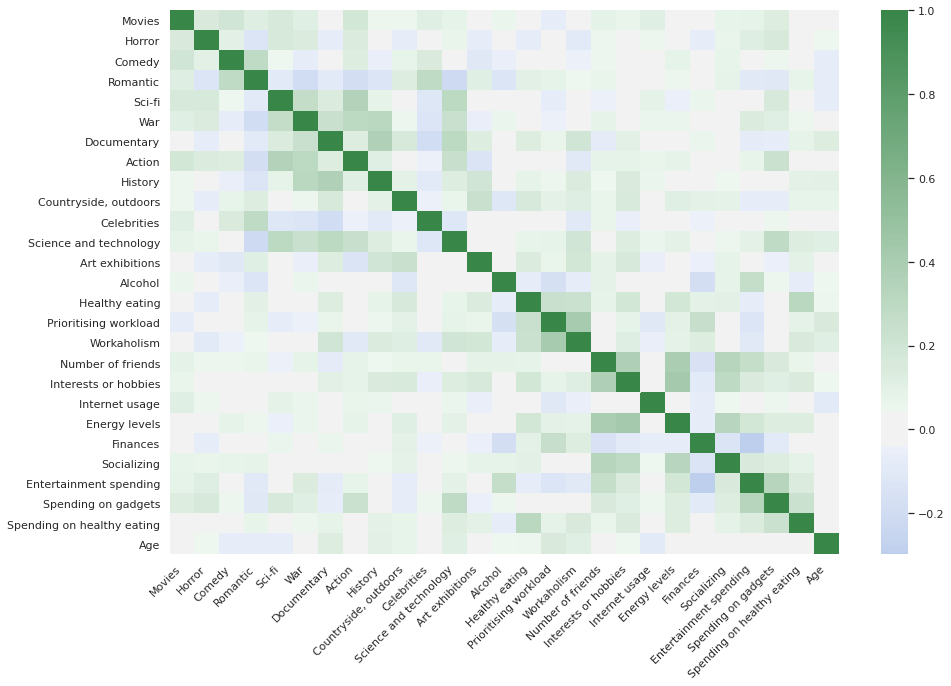

In [10]:
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.heatmap(final.corr(),center=0.00,cmap=sns.diverging_palette(255, 133,as_cmap=True))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We can see that there is some correlation between quite a few of the variables but mostly less than 0.2. Therefore we are not going to be removing any variables as none seem completely redundant. Let us take a look at the relationship between some of the more correlated variables.

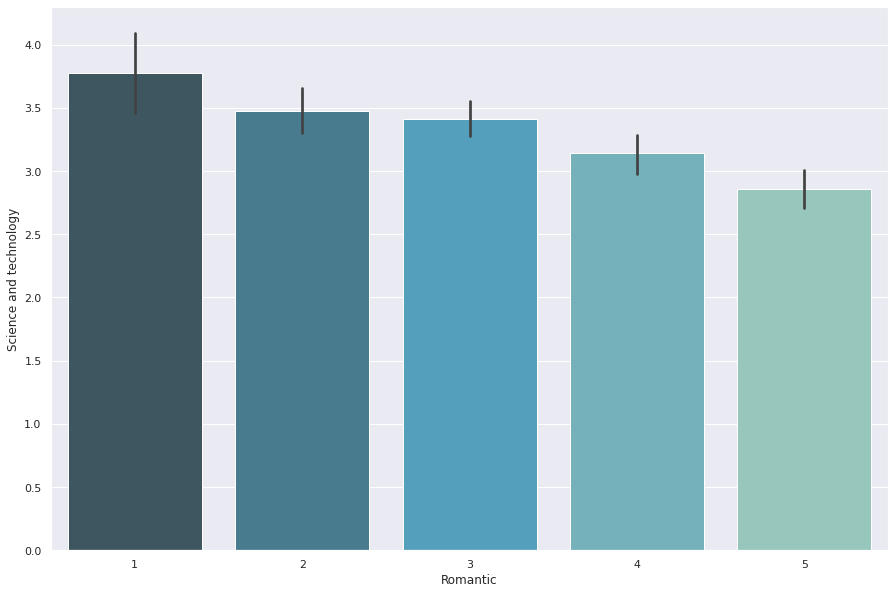

In [56]:
sns.barplot(final['Romantic'],final['Science and technology'],palette="GnBu_d");

Straight away we can see the negative relation between their choice of movies of Romance genre of a person and their inclination for science and technology.

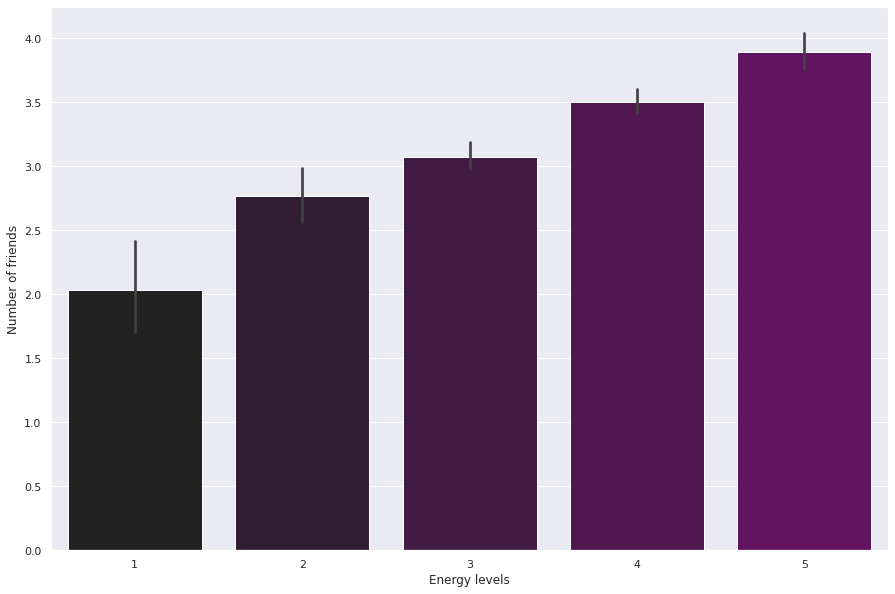

In [12]:
sns.barplot(final['Energy levels'],final['Number of friends'],palette=sns.dark_palette("purple"));

Similarly we can see the positive relationship between the number of friends and energy levels.

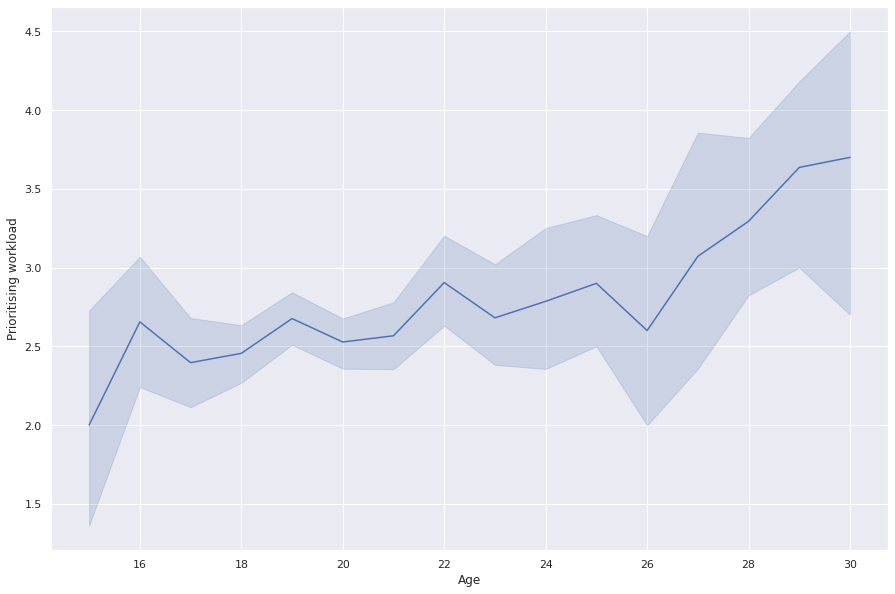

In [13]:
sns.lineplot(final['Age'],final['Prioritising workload'],palette="GnBu_d");

Right away we can see that as age increases so does priority for workload. With that, we have come to the end of the EDA and preprocessing. 

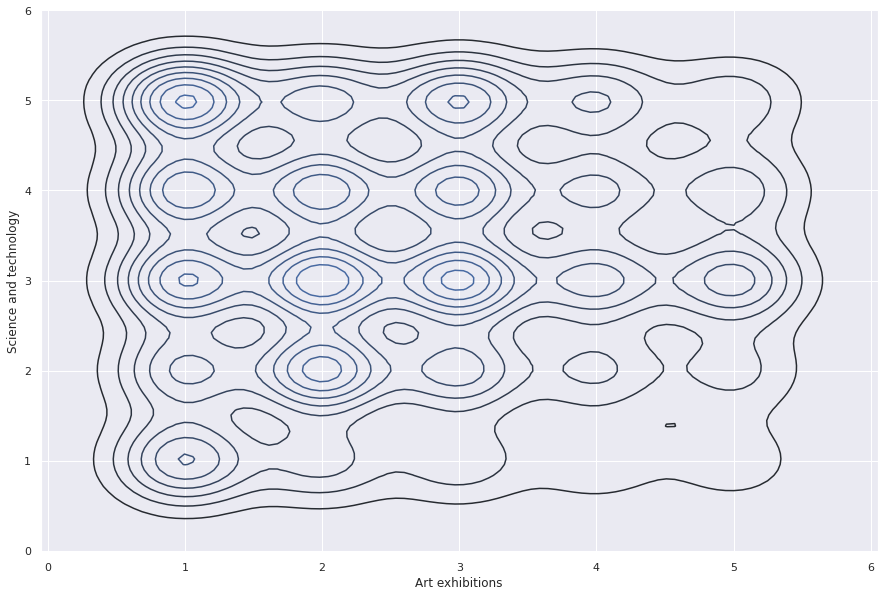

In [57]:
sns.kdeplot(final['Art exhibitions'],final['Science and technology']);

Plotting the density graphs we can see that a person more inclined towards science and technology often tends to be less so interested in art. Let us see how the clustering algorithms work and what conclusions we can make from them.

## Clustering analysis:
For our analysis we will be trying K-Means clustering as well asagglomerative clustering. We will be trying both models and will select the one  that works well. We also have an idea of how many clusters we want/ expecting. We want around 4-6 clusters. This is because of the variables we have chosen and the aprroximate number of personality types we can estimate to have. 
We will start of with KNN.
## KNN clustering:
Firstly, we will determine the exact number of clusters we want to input using the elbow method.

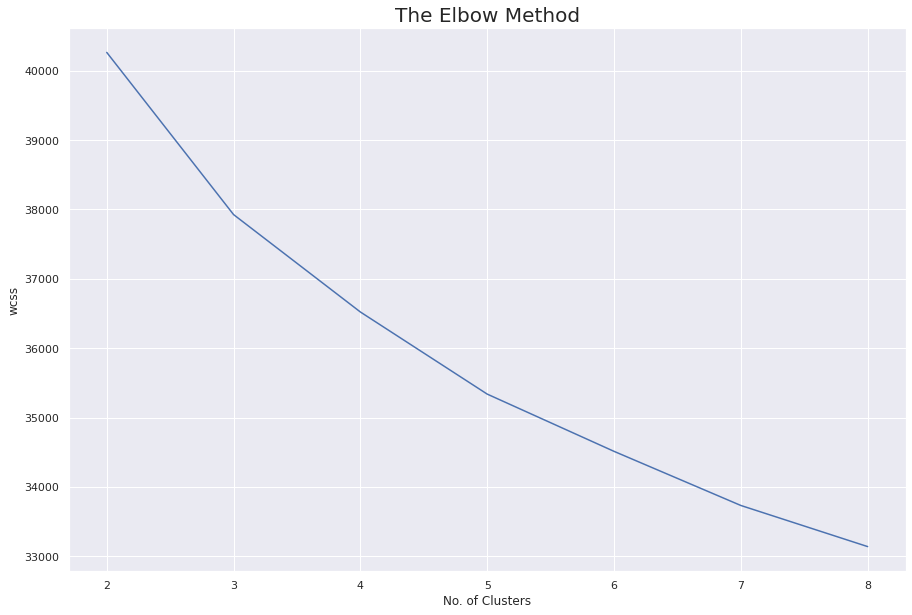

In [15]:
from sklearn.cluster import KMeans
x=final
wcss = []
for i in range(2, 9):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 3000, n_init = 10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(2, 9), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Looking at the graph above we decide to choose 5 clusters for our final analysis.

In [16]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, n_init = 30)
km.fit(x)
y_means=km.predict(x)


To measure how well our model performed we will be using Silhouette score as shown below( it has a range of -1 to 1)

In [17]:
silhouette_score(x,y_means)

0.0657080069342479

Straight away we can see that this score is bad. A score of 0 essentially means the boundary between the clusters are touching and the distance is nill. This is a fairly discouraging statistics. Next, let us try adjusting our variables to see if we get better results. The extremely low Silhouette score could be due to a few reasons, this includes the possibility that there are no clusters as such. It could also be because there input variables are poorly chosen or our model is poorly optimized. Perhaps some other models could work better.

Below, we have tried fewer variables that we consider important and indicative of the individuals personality and tried a combination of them with varying parameters. We will be also plotting the Silhouette score vs the number of clusters to better choose how many clusters we will be using.

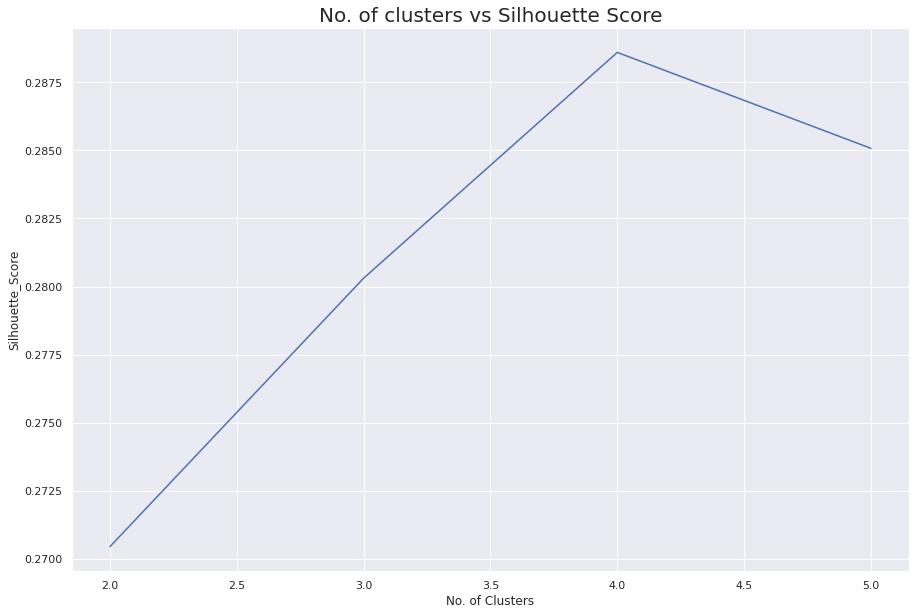

In [23]:
x=final[['Science and technology','Countryside, outdoors','Art exhibitions']]

scaler=StandardScaler()
scaler.fit(x)
wcss = []
#x=scaler.transform(x)
for i in range(2, 6):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10,random_state=0)
    km.fit(x)
    y_means=km.predict(x)
    s=silhouette_score(x,y_means)
    wcss.append(s)
plt.plot(range(2, 6), wcss)
plt.title('No. of clusters vs Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette_Score')
plt.show()

With some tweaking we see that our silhouette score has improved considerably. It is not great still but much better and possibly the clusters hold meaning.

Let us take the group by the clusters and see if we can recognize patterns in our clusters.

In [101]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, n_init = 30,random_state=2)
km.fit(x)
y_means=km.predict(x)
final['y_means']=y_means
final.groupby('y_means').mean()

,Movies,Horror,Comedy,Romantic,Sci-fi,War,Documentary,Action,History,"Countryside, outdoors",Celebrities,Science and technology,Art exhibitions,Alcohol,Healthy eating,Prioritising workload,Workaholism,Number of friends,Interests or hobbies,Internet usage,Energy levels,Finances,Socializing,Entertainment spending,Spending on gadgets,Spending on healthy eating,Age
y_means,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.569620,2.919831,4.358650,3.156118,3.210970,3.071730,3.447257,3.687764,3.021097,2.101266,2.451477,3.388186,2.021097,3.257384,2.827004,2.485232,2.818565,3.257384,3.265823,4.198312,3.434599,2.886076,3.004219,3.270042,3.130802,3.447257,20.286920
1,4.603704,2.770370,4.618519,3.825926,2.725926,3.000000,3.281481,3.288889,3.018519,3.959259,2.518519,1.959259,1.825926,2.955556,2.944444,2.600000,2.659259,3.348148,3.392593,4.107407,3.644444,3.122222,3.118519,3.062963,2.503704,3.403704,20.129630
2,4.661290,2.584677,4.387097,3.737903,2.995968,3.024194,3.842742,3.266129,3.532258,4.278226,2.366935,3.060484,4.318548,3.044355,3.181452,2.717742,3.266129,3.455645,3.786290,4.116935,3.645161,2.987903,3.314516,3.165323,2.657258,3.689516,20.512097
3,4.627451,2.905882,4.600000,3.207843,3.545098,3.525490,4.027451,3.925490,3.262745,4.305882,2.105882,4.603922,2.231373,3.047059,3.168627,2.780392,3.254902,3.309804,3.760784,4.337255,3.803922,3.082353,3.188235,3.317647,3.223529,3.698039,20.803922


We can see some interesting patterns.This is particularly notable with our variables we have chosen to cluster and we can possibly cluster into reasonable groups. We can see that for group 2 has a strong inclination towards outdoor activities as well as a very strong inclination towards the arts, healthy eating and has multiple interests while working quite hard while being quite social. Seems like quite the all rounder. 

Taking a look at the group 3, we can straight away see an interest for science and technology as well as an interest in Sci-Fi,action,War movise etc while also being quite responsible. We can categorize as the geek.

Looking at group 1, the characteristics that stand out are the increased scores for romantic movies as well as Celebrities(the difference may seem low but running the model multiple times there is almost always an inevitable celebrity/romantic category with a strong distaste for science and tech with some other significant differences. We can bring them under the category hopeless romantic.

Th final category, group 0, the stand out are the increased affinity for horror movies and alcohol while having the least energy,  we can aptly name them outcasts.


Finally, let us take a look at the plot of our three attributes used for our analysis in a 3D interactive map done using plotly.

In [20]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
  
trace1 = go.Scatter3d(
    x= final['Science and technology'],
    y= final['Countryside, outdoors'],
    z= final['Art exhibitions'],
    mode='markers',
     marker=dict(
        color = final['y_means'], 
        size= 10,
        line=dict(
            color= final['y_means'],
            width= 12
        ),
        opacity=0.9
     )
)
dg = [trace1]

layout = go.Layout(
    title = '3D visualization of clusters',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
 
)
configure_plotly_browser_state()

fig = go.Figure(data = dg, layout = layout)

fig.show()

One point we can note is that it does not look like a regular clustering algorithm graph mostly due to the fact that all our variables are categorical and every point in our 3D space will be occupied.
With that we have come to the end of our analysis using KNN. Next we will take a look at our data using agglomarative clustering(hierarchical clustering).

## Heirarchical clustering:
Here on, we will be using our data set which has been used for K-means clustering. We will proceed to prioritize this algorithm  and conduct further analysis on this method in the case that the silhouette score obtained for heirarchical clustering is higher than that of K means.
First, we will take a look at the dendogram produced using this algorithm.

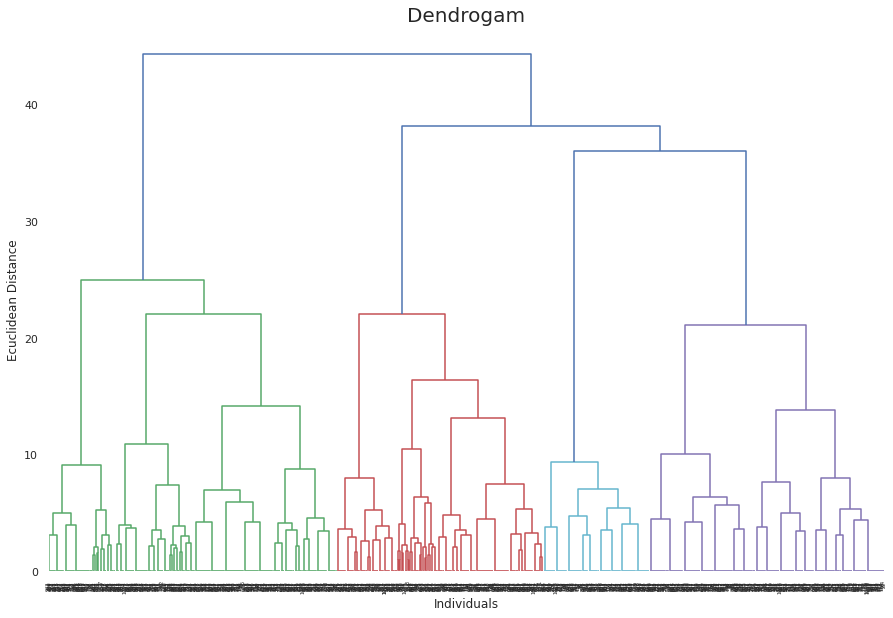

In [47]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Individuals')
plt.ylabel('Ecuclidean Distance')
plt.show()

Now we will use heirarchical clustering and check our silhouette score.

In [48]:
from sklearn.cluster import AgglomerativeClustering
x=final[['Science and technology','Countryside, outdoors','Art exhibitions']]
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean')
y_hc = hc.fit_predict(x)

In [49]:
silhouette_score(x,y_hc)

0.22170401892280436

The value is lower than what we obtained from K- Means. With that we have come to an end of our analysis with heirarchical clustering. With that we decide to use KNN. There is a high chance there is not too many well distinguised clusters in our dataset and clearly using all the variables we have selected here was not a suitable choice. With that we come to an end of our analysis.

## What kind of person are you!?:
In this final section we will classify you into one of the 4 classes we have formed! Fill in the values below!

First, rate how much you like doing art or visiting exhibitions etc. from 1-5, one being strongly disliking  and 5 being really liking it.


In [109]:
Art = input(" Enter your score here: ")

 Enter your score here: 5


Next, rate how much you enjoy the outdoors:

In [106]:
Outdoors = input(" Enter your score here: ")

 Enter your score here: 4.3


And finally, rate how much you are interested in science and technology.

In [110]:
Science = input(" Enter your score here: ")

 Enter your score here: 2


In [113]:
test=[[Science,Outdoors,Art]]
y_means=km.predict(test)
y_means[0]
if y_means[0]==2:
  print("You are identified to be an all rounder!")
elif y_means[0]==3:
  print("You are identified to be a geek!")
elif y_means[0]==1:
  print("You are identified to be a hopeless romantic!")
else:
  print("You are identified to be an outcast!")

You are identified to be an all rounder!


With that we have come to an end to this clustering analysis!
I hope you enjoyed it despite its rather poor outcome. There is much to be improved on and much left wanted. However, it has been a learning experience for me as this is my first time doing a clustering analysis. Now that I have completed the project I better understand how clusterin works and how clustering doesn't( I believe I personally learnt a bit more of the latter in this case). It is also sometimes said clustering is not suitable for categorical variables and perhaps that could be a reason as well as to why it performed as given.
 Thank you for taking the time to go through this!